Вариант 6

In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Initial initialization

In [13]:
ksi = 1/15
A = 1/10
B = 1/12
h = 1/2
c2 = ksi
a21 = c2
b2 = 1/(2*c2)
b1 = 1-1/(2*c2)

In [14]:
def norm_2(x):
    return np.sqrt(np.sum(np.power(np.array(x), 2))) 

def norm_1(x):
    return np.abs(np.array(x)).sum()

def norm_inf(x):
    return np.max(np.abs(np.array(x)))

In [25]:
def runge_kutta_my_scheme(h, y1, y2):
    k11 = h*y2*A
    k12 = -h*y1*B
    k21 = h*(y2*A + a21*k11)
    k22 = h*(-y1*B + a21*k12)
    y1 = y1 + (b1*k11 + b2*k21)
    y2 = y2 + (b1*k12 + b2*k22)
    return [y1, y2]

def solve_my_scheme(h):
    eps_local = 1e-5
    y = [np.pi/12, np.pi/10]
    whole_y = [[np.pi/12, np.pi/10]]
    whole_h = [h]
    y_h1 = [np.pi/12, np.pi/10]
    y_h2 = [np.pi/12, np.pi/10]
    delta = 1e2
    x = 0
    count_local = -1
    flag = False
    while x <= np.pi:
        if x + h > np.pi:
            h = np.pi - x
            flag = True
        count_local += 1
        # Вычисляем приближенные решения в точке x+h
        y_h1 = runge_kutta_my_scheme(h, y_h1[0], y_h1[1])
        y_h2 = runge_kutta_my_scheme(h/2, y_h2[0], y_h2[1])
        y_h2_necc = y_h2.copy()
        y_h2 = runge_kutta_my_scheme(h/2, y_h2[0], y_h2[1])
        
        # Находим локальную погрешность
        delta_y1 = abs(y_h2[0] - y_h1[0])/3
        delta_y2 = abs(y_h2[1] - y_h1[1])/3
        delta = [delta_y1, delta_y2]
        
        # Меняем шаг и рассматриваемое значение x
        if flag:
            y = y_h1
            whole_y.append(y)
            x += h
            whole_h.append(h)
            return delta, y, whole_y, whole_h, count_local
        if norm_2(delta) > eps_local*4:
            # Уменьшаем шаг в 2 раза и вычисляем заново в той же точке.
            y_h1 = y
            y_h2 = y
            h /= 2
        elif norm_2(delta) <= eps_local*4 and norm_2(delta) > eps_local:
            # В качестве искомого решения используем приближение y(x+h), где h=h/2, при этом сокращаем шаг
            # пополам для продолжения. Т е т к сейчас рассматриваем y(x+h), возвращаемся в точку x и ищем
            # y(x+h/2), после сокращаем шаг в 2 раза.
            y = y_h2_necc
            y_h1 = y
            y_h2 = y
            whole_y.append(y)
            h /= 2
            x += h
        elif norm_2(delta) >= eps_local/8 and norm_2(delta) <= eps_local:
            # Все ОК. Продолжаем вычисления с тем же шагом.
            y = y_h1
            y_h1 = y
            y_h2 = y
            whole_y.append(y)
            x += h
        elif norm_2(delta) < eps_local/8:
            # В этом случае увеличиваем шаг в 2 раза и идем дальше.
            y = y_h1
            y_h1 = y
            y_h2 = y
            whole_y.append(y)
            x += h
            h *= 2
        whole_h.append(h)
    return delta, y, whole_y, whole_h, count_local
        
def start_my_scheme():
    eps = 1e-4
    DELTA = (1/np.pi)**3 + norm_2([np.pi/12, np.pi/10])**3
    h = (eps/DELTA)**(1/3)
#     print(h)
    delta, y, whole_y, whole_h, count_local = solve_my_scheme(h)
    print(f'Count_local = {count_local}, norm_2_delta = {norm_2(delta)}\ny = {y}')
    return np.array(whole_y), whole_h        

In [26]:
y_my_scheme, whole_h = start_my_scheme()
y1_my_scheme = y_my_scheme[:, 0]
y2_my_scheme = y_my_scheme[:, 1]

Count_local = 62, norm_2_delta = 7.309853658212127e-06
y = [0.35051721294799654, 0.23160392422935613]


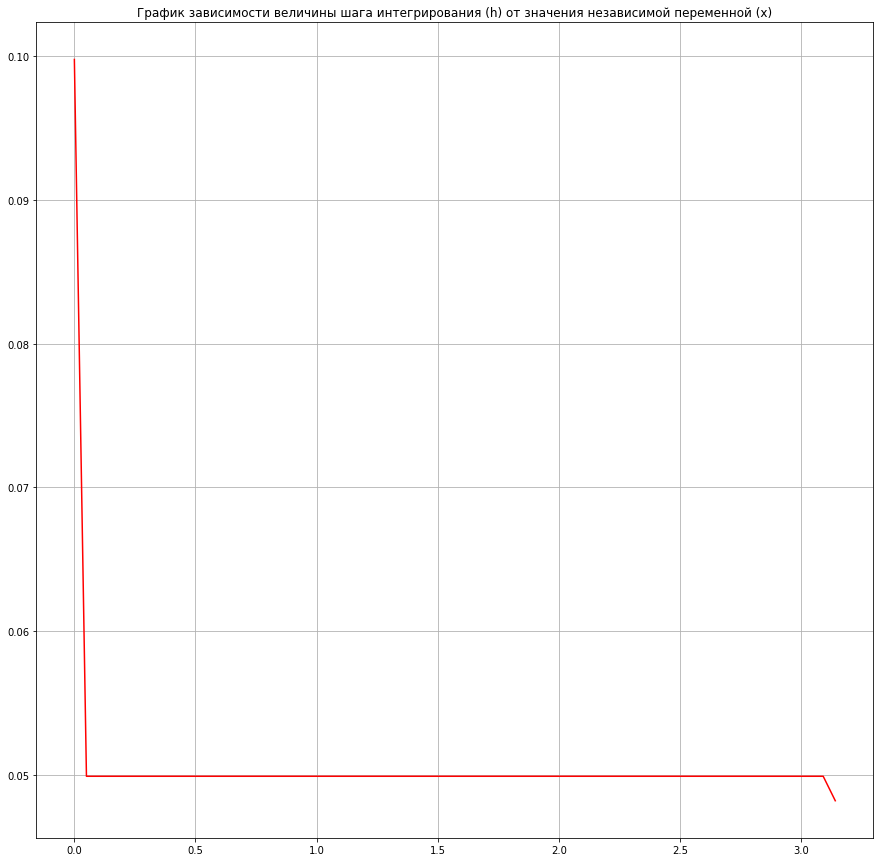

In [27]:
x = np.linspace(0, np.pi, len(whole_h))
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.title("График зависимости величины шага интегрирования (h) от значения независимой переменной (x)")
plt.plot(x, whole_h, color='red');

In [28]:
def runge_kutta_opponent(h, y1, y2):
    k11 = h*y2*A
    k12 = -h*y1*B

    k21 = h*(y2*A + 1/2*k11)
    k22 = h*(-y1*B + 1/2*k12)

    k31 = h*(y2*A + 1/2*(np.sqrt(2)-1)*k11 + (1 - 1/np.sqrt(2)) * k21)
    k32 = h*(-y1*B + 1/2*(np.sqrt(2)-1)*k12 + (1 - 1/np.sqrt(2)) * k22)

    k41 = h*(y2*A - 1/np.sqrt(2)*k21 + (1 + 1/np.sqrt(2)) * k31)
    k42 = h*(-y1*B - 1/np.sqrt(2)*k22 + (1 + 1/np.sqrt(2)) * k32)

    y1 = y1 + (1/6*k11 + 1/3*(1 - 1/np.sqrt(2))*k21 + 1/3*(1 + 1/np.sqrt(2))*k31 + 1/6*k41)
    y2 = y2 + (1/6*k12 + 1/3*(1 - 1/np.sqrt(2))*k22 + 1/3*(1 + 1/np.sqrt(2))*k32 + 1/6*k42)
    return [y1, y2]

def solve_opponent(h):
    eps_local = 1e-5
    y = [np.pi/12, np.pi/10]
    whole_y = [[np.pi/12, np.pi/10]]
    whole_h = [h]
    y_h1 = [np.pi/12, np.pi/10]
    y_h2 = [np.pi/12, np.pi/10]
    delta = 1e2
    x = 0
    flag = False
    count_local = -1
    while x <= np.pi:
        if x + h > np.pi:
            h = np.pi - x
            flag = True
        count_local += 1
        # Вычисляем приближенные решения в точке x+h
        y_h1 = runge_kutta_opponent(h, y_h1[0], y_h1[1])
        y_h2 = runge_kutta_opponent(h/2, y_h2[0], y_h2[1])
        y_h2_necc = y_h2.copy()
        y_h2 = runge_kutta_opponent(h/2, y_h2[0], y_h2[1])
        
        # Находим локальную погрешность
        delta_y1 = abs(y_h2[0] - y_h1[0])/15
        delta_y2 = abs(y_h2[1] - y_h1[1])/15
        delta = [delta_y1, delta_y2]
    
        # Меняем шаг и рассматриваемое значение x
        if flag:
            #Обработка случая x+h>pi
            y = y_h1
            whole_y.append(y)
            x += h
            whole_h.append(h)
            return delta, y, whole_y, whole_h, count_local
        if norm_2(delta) > eps_local*16:
            # Уменьшаем шаг в 2 раза и вычисляем заново в той же точке.
            y_h1 = y
            y_h2 = y
            h /= 2
        elif norm_2(delta) <= eps_local*16 and norm_2(delta) > eps_local:
            # В качестве искомого решения используем приближение y(x+h), где h=h/2, при этом сокращаем шаг
            # пополам для продолжения. Т е т к сейчас рассматриваем y(x+h), возвращаемся в точку x и ищем
            # y(x+h/2), после сокращаем шаг в 2 раза.
            y = y_h2_necc
            y_h1 = y
            y_h2 = y
            whole_y.append(y)
            h /= 2
            x += h
            
        elif norm_2(delta) >= eps_local/32 and norm_2(delta) <= eps_local:
            # Все ОК. Продолжаем вычисления с тем же шагом
            y = y_h1
            y_h1 = y
            y_h2 = y
            whole_y.append(y)
            x += h
        elif norm_2(delta) < eps_local/32:
            # В этом случае увеличиваем шаг в 2 раза и идем дальше.
            y = y_h1
            y_h1 = y
            y_h2 = y
            whole_y.append(y)
            x += h
            h *= 2
        whole_h.append(h)
    return delta, y, whole_y, whole_h, count_local
        
def start_opponent():
    R = 1e2
    eps = 1e-4
    DELTA = (1/np.pi)**5 + norm_2([np.pi/12, np.pi/10])**5
    h = (eps/DELTA)**(1/5)
    delta, y, whole_y, whole_h, count_local = solve_opponent(h)
    print(f'Count_local = {count_local}, norm_2_delta = {norm_2(delta)}\ny = {y}')
    return np.array(whole_y), whole_h  

In [29]:
y_opponent, whole_h = start_opponent()
y1_opponent = y_opponent[:, 0]
y2_opponent = y_opponent[:, 1]

Count_local = 33, norm_2_delta = 4.935252102864606e-08
y = [0.352612498082877, 0.22943357561185881]


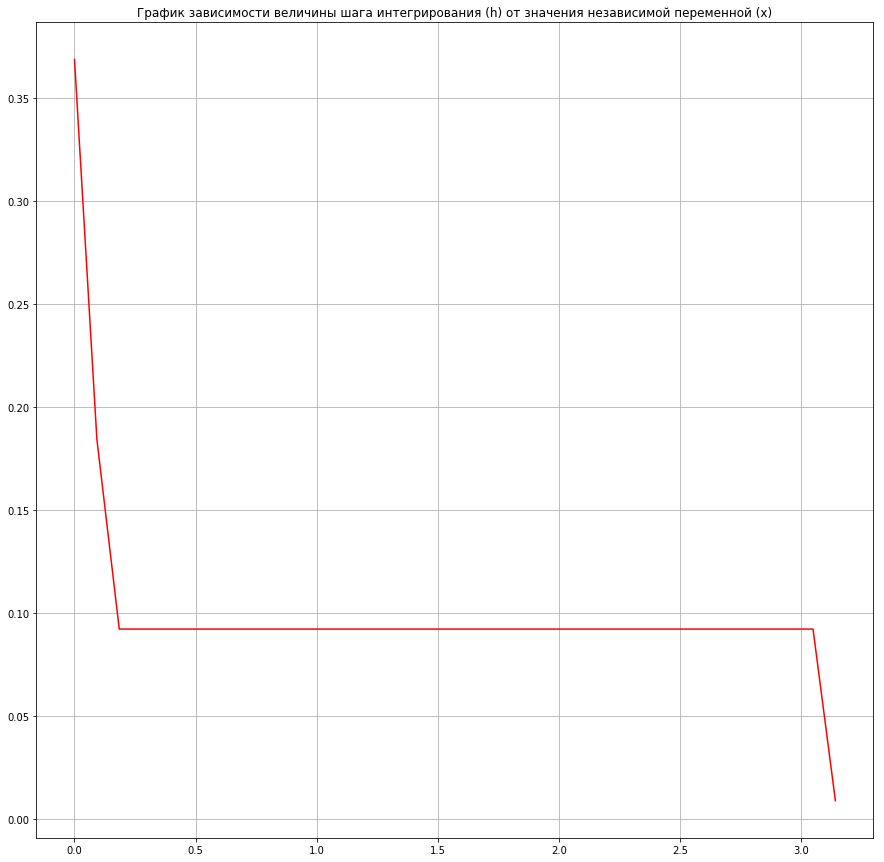

In [30]:
x = np.linspace(0, np.pi, len(whole_h))
plt.figure(figsize=(15, 15))
plt.grid(True)
plt.title("График зависимости величины шага интегрирования (h) от значения независимой переменной (x)")
plt.plot(x, whole_h, color='red');

### Сравнение.

In [31]:
%%time
temp = start_my_scheme()

Count_local = 62, norm_2_delta = 7.309853658212127e-06
y = [0.35051721294799654, 0.23160392422935613]
CPU times: user 3.14 ms, sys: 93 µs, total: 3.24 ms
Wall time: 3.2 ms


In [32]:
%%time
temp = start_opponent()

Count_local = 33, norm_2_delta = 4.935252102864606e-08
y = [0.352612498082877, 0.22943357561185881]
CPU times: user 3.47 ms, sys: 0 ns, total: 3.47 ms
Wall time: 3.33 ms
